

```
# Tiene formato de código
```
# Project

Our project consists on the analysis of the most listened songs in the last 10 years and their associated characteristics or metadata to explore how the most popular songs have changed through time and derive some insights in order to have a better grasp of the trends.

# Import

For that purpose, we will use Pandas, which is a very popular library when it comes to Data Science. That will require us to import Numpy too. By now, this is pretty much a standard setting.

We will base our project on Spotify, and, therefore, we will make use of the Spotify's playlist files downloaded using a webpage exportify.net. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

# load files
top2011 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2011.csv", parse_dates=['Release Date'])
top2012 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2012.csv", parse_dates=['Release Date'])
top2013 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2013.csv", parse_dates=['Release Date'])
top2014 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2014.csv", parse_dates=['Release Date'])
top2015 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2015.csv", parse_dates=['Release Date'])
top2013 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2013.csv", parse_dates=['Release Date'])
top2014 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2014.csv", parse_dates=['Release Date'])
top2015 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2015.csv", parse_dates=['Release Date'])
top2016 = pd.read_csv('https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2016.csv?token=GHSAT0AAAAAABQ5OJTA7TRX3QVG53FRH5F2YPQDQDA', parse_dates=['Release Date'])
top2017 = pd.read_csv('https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_hits_of_2017.csv?token=GHSAT0AAAAAABQ5OJTB2ZTFO5Y36NS6L3IKYPQDRVQ', parse_dates=['Release Date'])
top2018 = pd.read_csv('https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_tracks_of_2018.csv?token=GHSAT0AAAAAABQ5OJTBNCGDSF5ZTXQE6CVGYPQDSFA', parse_dates=['Release Date'])
top2019 = pd.read_csv('https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_tracks_of_2019.csv?token=GHSAT0AAAAAABQ5OJTBOQCF34IHN2R7CULMYPQDSZA', parse_dates=['Release Date'])
top2020 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_tracks_of_2020.csv?token=GHSAT0AAAAAABQ5OJTBYWTGTO6WQKSN5DGEYPQDTLQ", parse_dates=['Release Date'])
top2021 = pd.read_csv("https://raw.githubusercontent.com/pepesmigaj2022/datawrangling2022/main/top_tracks_of_2021.csv?token=GHSAT0AAAAAABQWGIXPOLFGQVD7ZOT2MA7KYPOTNPA", parse_dates=['Release Date'])
toplist = [top2011, top2012, top2013, top2014, top2015, top2016, top2017, top2018, top2019, top2020, top2021]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# add Year column
top2011['Year'] = 2011; top2012['Year'] = 2012; top2013['Year'] = 2013
top2014['Year'] = 2014; top2015['Year'] = 2015; top2016['Year'] = 2016
top2017['Year'] = 2017; top2018['Year'] = 2018; top2019['Year'] = 2019
top2020['Year'] = 2020; top2021['Year'] = 2021

# trimming to the same size
toplist = [top[0:50] for top in toplist]
for top in toplist:
  top['Rank'] = (top.index + 1) % 50
  top['Rank'] = top['Rank'].replace(0,50)

# add 'Position' column and merge
tops = pd.concat(toplist, ignore_index=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


First we plot the mean numerical data from the data frame to get the general idea about our dataset. 

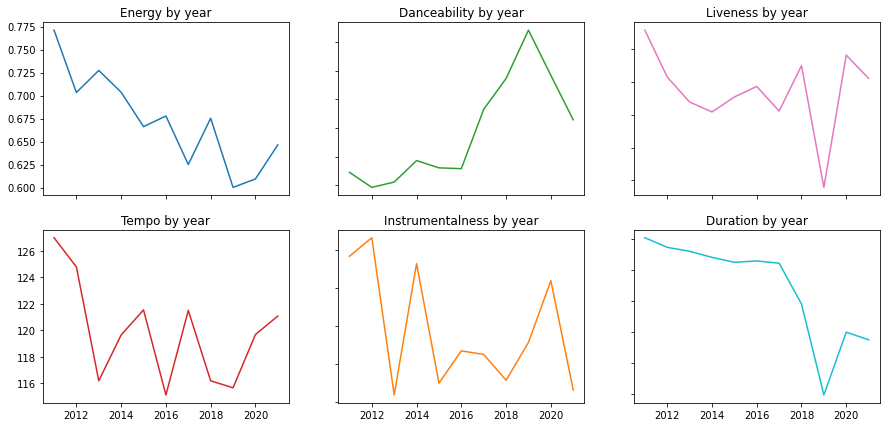

In [ ]:
stats = tops.groupby("Year").mean()

# plotting some parameters cause i have no better idea what to do with them
fig, axs = plt.subplots(2,3, figsize = (15,7))
axs[0,0].plot(stats["Energy"])
axs[0,0].set_title("Energy by year")
axs[0,1].plot(stats["Danceability"], "tab:green")
axs[0,1].set_title("Danceability by year")
axs[1,0].plot(stats["Tempo"], "tab:red")
axs[1,0].set_title("Tempo by year")
axs[1,1].plot(stats["Instrumentalness"], "tab:orange")
axs[1,1].set_title("Instrumentalness by year")
axs[0,2].plot(stats["Liveness"], "tab:pink")
axs[0,2].set_title("Liveness by year")
axs[1,2].plot(stats["Duration (ms)"], "tab:cyan")
axs[1,2].set_title("Duration by year")
for ax in axs.flat:
    ax.label_outer()


We made graphs for parameters: energy, danceability, liveness, tempo, instrumentalness and duration. All the graphs are based on a mean value of a given parameter for a given year. We can see a decline over the years in energy and duration of songs and rise in danceability. We see no correlation with time in terms of tempo, instrumentalness and liveness. 

Then, we define a function count_overlapping. This function will allow us to summarize the non-numerical data in the dataset by returning the list of different attributes found in a given column and a number indicating how many times it appears in a given dataframe.

In [ ]:
def count_overlapping(df, column):
  result = []
  for i in range(len(df)):
    for j in df[column][i].split(','):
      result.append(j)
  result = pd.DataFrame({column: result, "count": [1]*len(result)}, index = range(len(result)))
  return result.groupby(column).count().sort_values("count", ascending = False)

We use the function to create a plot showing changes in the three most popular genres in each year. 

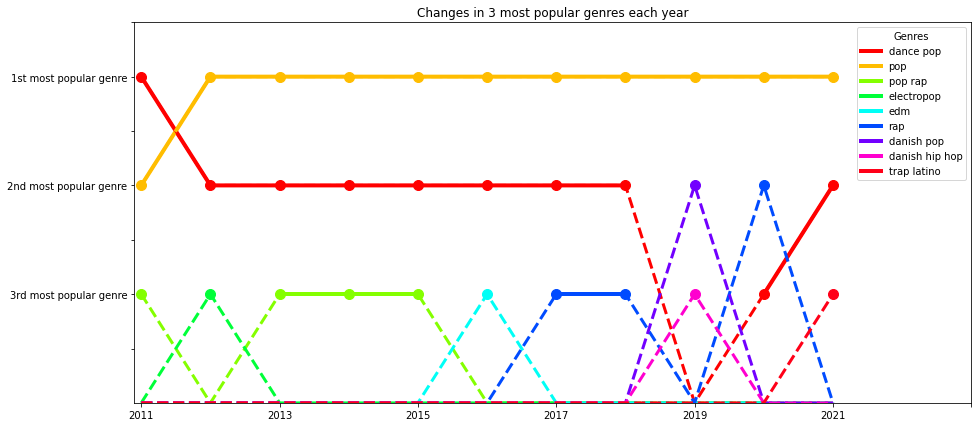

In [ ]:
genre_list = []
for top in toplist:
  topcount = count_overlapping(top, 'Genres').head(3)
  topcount["placement"] = [3,2,1]
  topcount = topcount["placement"]
  genre_list.append(topcount)

gen = pd.concat(genre_list, axis = 1)
gen.columns = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
new_gen = gen.T
ax = new_gen.plot(figsize = (15,7),colormap = "hsv", title = "Changes in 3 most popular genres each year", xlim = (-0.1, 12), ylim = (0.001, 3.5), style = "o-", lw = 4, ms = 10)
gen = gen.fillna(0)
gen.T.plot(figsize = (15,7), colormap = "hsv", title = "Changes in 3 most popular genres each year", xlim = (-0.1, 12), ylim = (0.001, 3.5), style = "--", lw = 3, ax = ax, legend = False)
new_gen

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[2] = '3rd most popular genre'
labels[4] = '2nd most popular genre'
labels[6] = '1st most popular genre'
ax.set_yticklabels(labels)
plt.show()

We created the plot first by using only the non-zero data in the dataset and plotting it with a solid line. After that, we filled the NaN values with zeros and plotted it with a dotted line to indicate where the given genre stopped being among the 3 most popular genres. 
The plot shows steady, not very dynamic changes in the first three thirds of the time. Then, there is a lot of fluctation and a lot of new genres appearing after year 2018. 

After that, we created a parameter indicating what percentage of all songs was written by the 5 most popular artists in a given year. The goal was to see if the industry is dominated by few superstars or is distributed fairly among different artists and if the situation was changing in the last 10 years. 

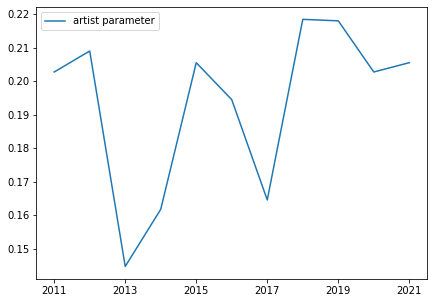

In [ ]:
big_artists = []
for top in toplist:
  num = count_overlapping(top, "Artist Name(s)").head().sum()/count_overlapping(top, "Artist Name(s)").sum()
  big_artists.append(float(num))

artist_df = pd.DataFrame({"artist parameter" : big_artists, "Year" : ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]})
ax = artist_df.plot(figsize = (7,5))

labels = [item.get_text() for item in ax.get_xticklabels()]
i = 0 
for i in range(6):
  labels[i+1] = str(2011+2*i)

ax.set_xticklabels(labels)
plt.show()


The plot was created by using our previously defined function count_overlapping. The plot did not lead us to any new conclusions as the artist parameter does not seem to be dependent on time in the last 10 years. 

We also wanted to get more insights on when the popular songs were being released. Thus, by using matplotlib we created a plot showing every years' amount of songs released in a given month and an average of all years. 

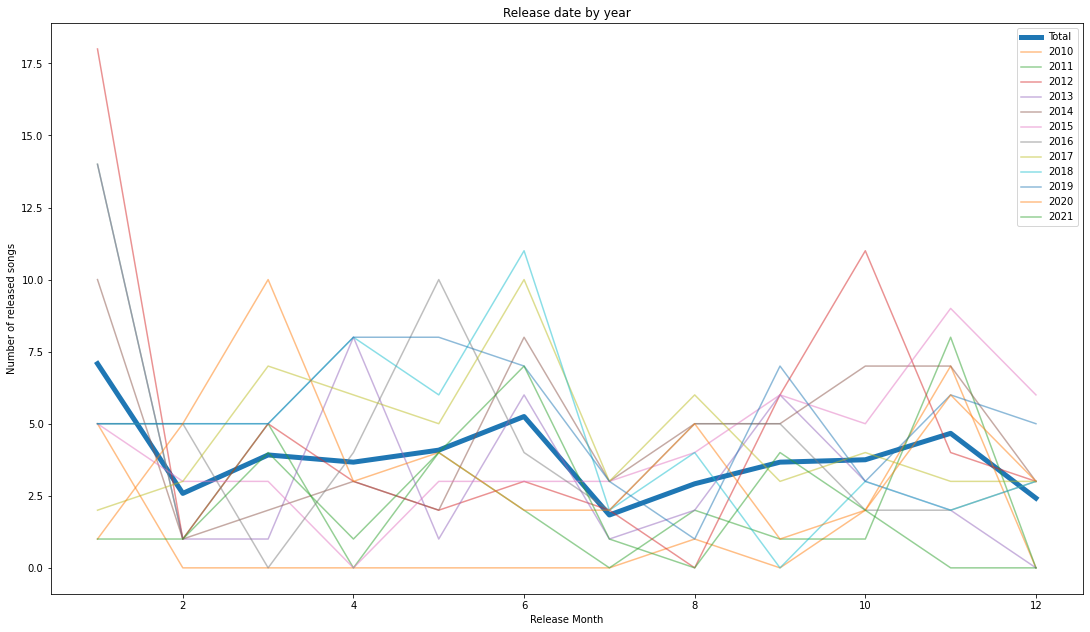

In [ ]:
tops['Release Month'] = tops['Release Date'].dt.month
tops['Release Year'] =  tops['Release Date'].dt.year

top_by_ym = tops.groupby(['Release Year', 'Release Month']).count()
top_by_ym_total = tops.groupby('Release Month').count()

piv = pd.pivot_table(top_by_ym, index=['Release Month'], columns=['Release Year'], fill_value=0)['Spotify ID']
piv['Total'] = piv.sum(axis=1)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(piv.index, piv['Total'] / len(piv.index), label='Total', alpha=1, linewidth=5)
plt.plot(piv.index, piv[2010], label='2010', alpha=0.5)
plt.plot(piv.index, piv[2011], label='2011', alpha=0.5)
plt.plot(piv.index, piv[2012], label='2012', alpha=0.5)
plt.plot(piv.index, piv[2013], label='2013', alpha=0.5)
plt.plot(piv.index, piv[2014], label='2014', alpha=0.5)
plt.plot(piv.index, piv[2015], label='2015', alpha=0.5)
plt.plot(piv.index, piv[2016], label='2016', alpha=0.5)
plt.plot(piv.index, piv[2017], label='2017', alpha=0.5)
plt.plot(piv.index, piv[2018], label='2018', alpha=0.5)
plt.plot(piv.index, piv[2019], label='2019', alpha=0.5)
plt.plot(piv.index, piv[2020], label='2020', alpha=0.5)
plt.plot(piv.index, piv[2021], label='2021', alpha=0.5)

plt.title('Release date by year')
plt.xlabel('Release Month')
plt.ylabel('Number of released songs')
plt.legend()



This graph was made possible by using the attribute alpha. This allowed us to make the yearly graph appear to be in the background, while the average of all the years is the main part of the graph. It shows us that the release dates are periodic, with peaks in January, June and November.

The last thing we decided to analyze was the number of songs released at least 2 years before the year in which they are trending. In other words: how often older songs are trending in each year? We set our logical criteria for this situation, calculated and then plotted the number of "old" songs appearing each year in the list of top songs. 

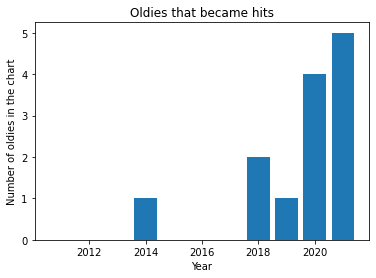

In [ ]:
criteria = tops['Release Year'] +1  < tops['Year']
oldies = tops[criteria]

oldies_count = oldies[['Spotify ID', 'Year']].groupby('Year').count().reindex(range(2011,2022), fill_value=0).stack()

plt.bar(x=range(2011,2022), height=oldies_count.values)
plt.title('Oldies that became hits')
plt.xlabel('Year')
plt.ylabel('Number of oldies in the chart')

oldies_xl = oldies[['Track Name', 'Artist Name(s)','Year', 'Release Year']]


Text(0, 0.5, 'Number of songs')

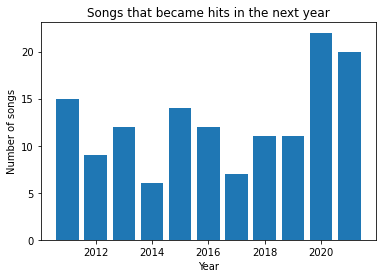

In [ ]:
criteria2 = tops['Release Year'] +1  == tops['Year']
oldies2 = tops[criteria2]

oldies_count2 = oldies2[['Spotify ID', 'Year']].groupby('Year').count().reindex(range(2011,2022), fill_value=0).stack()

plt.bar(x=range(2011,2022), height=oldies_count2.values)
plt.title('Songs that became hits in the next year')
plt.xlabel('Year')
plt.ylabel('Number of songs')